In [988]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [989]:
df = pd.read_csv('C:/Users/FRANK/Desktop/Proyectos Linkedin/Python Proyectos/Dia 5/top_1000_tiktokers.csv')
df.head()

,Rank,Username,Tiktok Link,Name,Subscribers Count,Views. Avg,Likes. Avg,Comments. Avg,Shares. Avg
0,1,badbunny,https://www.tiktok.com/@badbunny,Bad Bunny,23.4M,63.1M,10.3M,65.2K,108.6K
1,2,noahschnapp,https://www.tiktok.com/@noahschnapp,Noah Schnapp,26.1M,23.4M,4.8M,46.7K,22.1K
2,3,khaby.lame,https://www.tiktok.com/@khaby.lame,Khabane lame,145.9M,47.5M,2.5M,46K,9.4K
3,4,coopernoriega,https://www.tiktok.com/@coopernoriega,Cooper Noriega,3.2M,31M,1.3M,120.9K,8.4K
4,5,avrillavigne,https://www.tiktok.com/@avrillavigne,Avril Lavigne,4M,24.7M,3.5M,32.1K,22.7K


In [990]:
df2 = df.copy()
print('Número de observaciones = {}'.format(df2.shape[0]))
print('Total de variables disponibles = {} '.format(df2.columns.shape[0]))
print('Columnas que cuentan con un valor nulo-')
print(df2.isnull().sum())

Número de observaciones = 1000
Total de variables disponibles = 9 
Columnas que cuentan con un valor nulo-
Rank                 0
Username             0
Tiktok Link          0
Name                 2
Subscribers Count    0
Views. Avg           0
Likes. Avg           0
Comments. Avg        0
Shares. Avg          0
dtype: int64


In [991]:
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Rank               1000 non-null   int64 
 1   Username           1000 non-null   object
 2   Tiktok Link        1000 non-null   object
 3   Name               998 non-null    object
 4   Subscribers Count  1000 non-null   object
 5   Views. Avg         1000 non-null   object
 6   Likes. Avg         1000 non-null   object
 7   Comments. Avg      1000 non-null   object
 8   Shares. Avg        1000 non-null   object
dtypes: int64(1), object(8)
memory usage: 70.4+ KB
None


In [992]:
print(df2[df2['Name'].isnull()])
print('-'*50)
print('La cuenta de iloveyourmomscatt no existe en tik tok')

     Rank           Username                                Tiktok Link Name  \
490   491      carloandsarah      https://www.tiktok.com/@carloandsarah  NaN   
686   687  iloveyourmomscatt  https://www.tiktok.com/@iloveyourmomscatt  NaN   

    Subscribers Count Views. Avg Likes. Avg Comments. Avg Shares. Avg  
490              3.9M       3.2M     279.7K          1.1K        1.9K  
686              8.2K       1.3M     159.3K          4.9K        3.3K  
--------------------------------------------------
La cuenta de iloveyourmomscatt no existe en tik tok


In [993]:
df2.fillna('Carlos and Sarah',inplace=True)
df2.drop(index=686 , inplace=True)

In [994]:
print('Columnas que cuentan con un valor nulo-')
print(df2.isnull().sum())
print('-'*50)
print(df2.info())

Columnas que cuentan con un valor nulo-
Rank                 0
Username             0
Tiktok Link          0
Name                 0
Subscribers Count    0
Views. Avg           0
Likes. Avg           0
Comments. Avg        0
Shares. Avg          0
dtype: int64
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Index: 999 entries, 0 to 999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Rank               999 non-null    int64 
 1   Username           999 non-null    object
 2   Tiktok Link        999 non-null    object
 3   Name               999 non-null    object
 4   Subscribers Count  999 non-null    object
 5   Views. Avg         999 non-null    object
 6   Likes. Avg         999 non-null    object
 7   Comments. Avg      999 non-null    object
 8   Shares. Avg        999 non-null    object
dtypes: int64(1), object(8)
memory usage: 78.0+ KB
None


In [995]:
def convert_to_int(value):
    value_str = str(value)
    if 'M' in value_str:
        return int(round(float(value_str.replace('M', '')) * 1e6))
    elif 'K' in value_str:
        return int(round(float(value_str.replace('K', '')) * 1e3))
    
# Aplicar la función a cada columna

columnas_millones = ['Subscribers Count','Views. Avg','Likes. Avg','Comments. Avg','Shares. Avg']

for column in columnas_millones:
    df2[column] = df2[column].apply(convert_to_int)

# Analisis

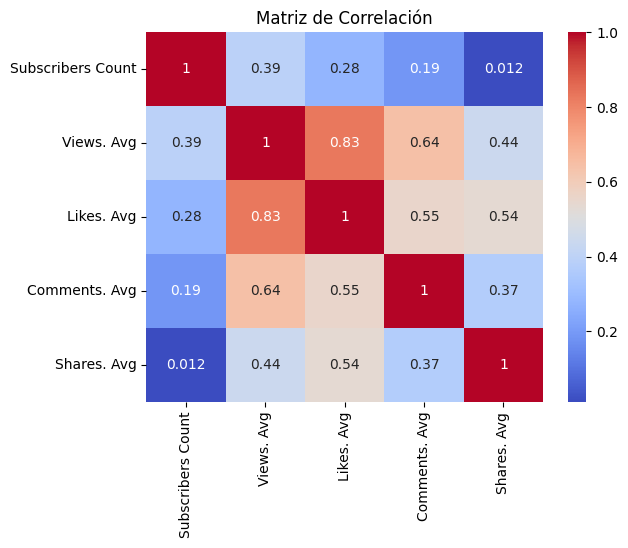

In [997]:
correlation_matrix = df2[['Subscribers Count', 'Views. Avg', 'Likes. Avg', 'Comments. Avg', 'Shares. Avg']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

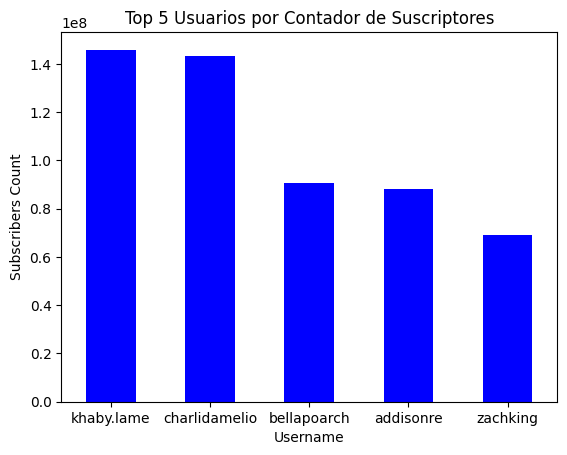

In [998]:
top_5_subs = df2.groupby('Username')['Subscribers Count'].sum()
top_5_subs = top_5_subs.sort_values(ascending=False).head()

top_5_subs.plot(kind='bar', color='blue')

# Configurar el título y las etiquetas del gráfico
plt.title('Top 5 Usuarios por Contador de Suscriptores')
plt.xlabel('Username')
plt.ylabel('Subscribers Count')
plt.xticks(rotation=0)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.show()

In [999]:
print('Las personas con mayor subscriptores:')
print(top_5_subs.reset_index().to_string(index=False))

Las personas con mayor subscriptores:
     Username  Subscribers Count
   khaby.lame          145900000
charlidamelio          143300000
  bellapoarch           90500000
    addisonre           88200000
     zachking           68900000


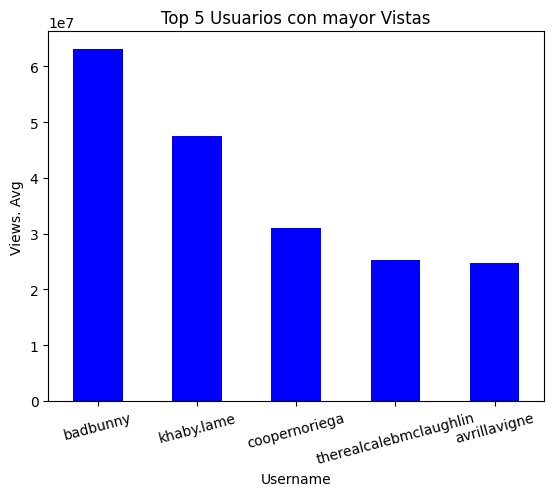

In [1000]:
top_5_views = df2.groupby('Username')['Views. Avg'].sum()
top_5_views = top_5_views.sort_values(ascending=False).head()

top_5_views.plot(kind='bar', color='blue')

# Configurar el título y las etiquetas del gráfico
plt.title('Top 5 Usuarios con mayor Vistas')
plt.xlabel('Username')
plt.ylabel('Views. Avg')
plt.xticks(rotation=15)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.show()

In [1001]:
print('Las personas con mayor vistas:')
print(top_5_views.reset_index().to_string(index=False))

Las personas con mayor vistas:
              Username  Views. Avg
              badbunny    63100000
            khaby.lame    47500000
         coopernoriega    31000000
therealcalebmclaughlin    25300000
          avrillavigne    24700000


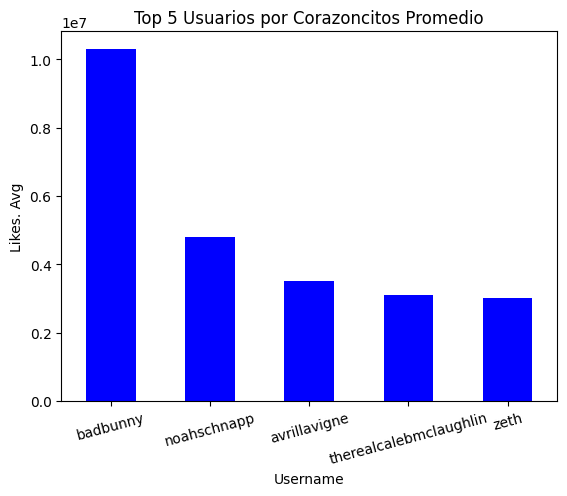

In [1002]:
top_5_heart = df2.groupby('Username')['Likes. Avg'].sum()
top_5_heart = top_5_heart.sort_values(ascending=False).head()

top_5_heart.plot(kind='bar', color='blue')

# Configurar el título y las etiquetas del gráfico
plt.title('Top 5 Usuarios por Corazoncitos Promedio')
plt.xlabel('Username')
plt.ylabel('Likes. Avg')
plt.xticks(rotation=15)
plt.show()

In [1003]:
print('Las personas con mayor corazoncitos:')
print(top_5_heart.reset_index().to_string(index=False))

Las personas con mayor corazoncitos:
              Username  Likes. Avg
              badbunny    10300000
           noahschnapp     4800000
          avrillavigne     3500000
therealcalebmclaughlin     3100000
                  zeth     3000000


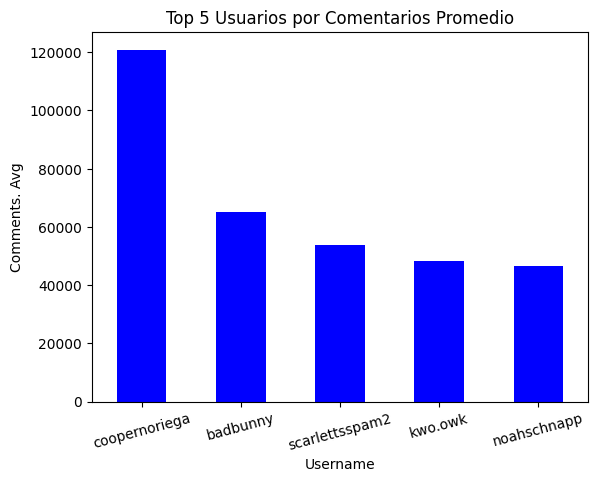

In [1004]:
top_5_comm = df2.groupby('Username')['Comments. Avg'].sum()
top_5_comm = top_5_comm.sort_values(ascending=False).head()

top_5_comm.plot(kind='bar', color='blue')

# Configurar el título y las etiquetas del gráfico
plt.title('Top 5 Usuarios por Comentarios Promedio')
plt.xlabel('Username')
plt.ylabel('Comments. Avg')
plt.xticks(rotation=15)
plt.show()

In [1005]:
print('Las personas con mayor comentarios :')
print(top_5_comm.reset_index().to_string(index=False))

Las personas con mayor comentarios :
      Username  Comments. Avg
 coopernoriega       120900.0
      badbunny        65200.0
scarlettsspam2        53900.0
       kwo.owk        48200.0
   noahschnapp        46700.0


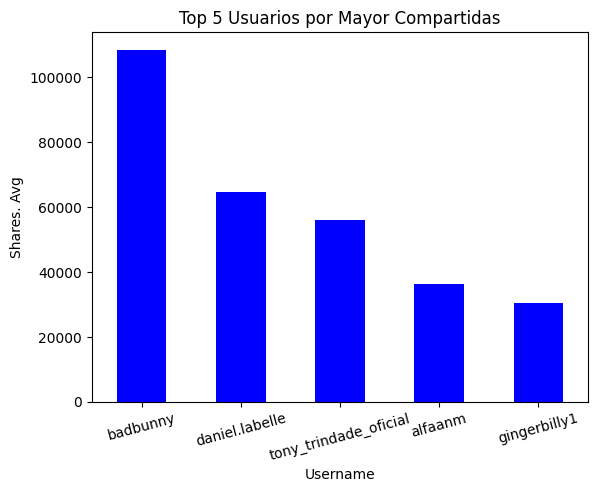

In [1006]:
top_5_shares = df2.groupby('Username')['Shares. Avg'].sum()
top_5_shares = top_5_shares.sort_values(ascending=False).head()

top_5_shares.plot(kind='bar', color='blue')

# Configurar el título y las etiquetas del gráfico
plt.title('Top 5 Usuarios por Mayor Compartidas')
plt.xlabel('Username')
plt.ylabel('Shares. Avg')
plt.xticks(rotation=15)
plt.show()

In [1007]:
print('Las personas con mayor compartidas :')
print(top_5_shares.reset_index().to_string(index=False))

Las personas con mayor compartidas :
             Username  Shares. Avg
             badbunny     108600.0
       daniel.labelle      64700.0
tony_trindade_oficial      56100.0
              alfaanm      36300.0
         gingerbilly1      30300.0


In [1008]:
df2.head(10)

,Rank,Username,Tiktok Link,Name,Subscribers Count,Views. Avg,Likes. Avg,Comments. Avg,Shares. Avg
0,1,badbunny,https://www.tiktok.com/@badbunny,Bad Bunny,23400000,63100000,10300000,65200.0,108600.0
1,2,noahschnapp,https://www.tiktok.com/@noahschnapp,Noah Schnapp,26100000,23400000,4800000,46700.0,22100.0
2,3,khaby.lame,https://www.tiktok.com/@khaby.lame,Khabane lame,145900000,47500000,2500000,46000.0,9400.0
3,4,coopernoriega,https://www.tiktok.com/@coopernoriega,Cooper Noriega,3200000,31000000,1300000,120900.0,8400.0
4,5,avrillavigne,https://www.tiktok.com/@avrillavigne,Avril Lavigne,4000000,24700000,3500000,32100.0,22700.0
5,6,therealcalebmclaughlin,https://www.tiktok.com/@therealcalebmclaughlin,Caleb McLaughlin,9000000,25300000,3100000,37700.0,8800.0
6,7,zeth,https://www.tiktok.com/@zeth,Zeth,12800000,14000000,3000000,7600.0,22600.0
7,8,daniel.labelle,https://www.tiktok.com/@daniel.labelle,Daniel LaBelle,26600000,9200000,1400000,15800.0,64700.0
8,9,charlidamelio,https://www.tiktok.com/@charlidamelio,charli d’amelio,143300000,18500000,1200000,29600.0,12700.0
9,10,scarlettsspam2,https://www.tiktok.com/@scarlettsspam2,scarlett,2100000,17900000,845800,53900.0,6300.0


In [1009]:
columnas_millones = ['Subscribers Count', 'Views. Avg', 'Likes. Avg', 'Comments. Avg', 'Shares. Avg']

totales = df2[columnas_millones].sum()

# Calcular los porcentajes de cada métrica
for column in columnas_millones:
    df2[f'{column} %'] = (df2[column] / totales[column]) * 100

# Mostrar los primeros 10 resultados con porcentajes
df2.head(10)

,Rank,Username,Tiktok Link,Name,Subscribers Count,Views. Avg,Likes. Avg,Comments. Avg,Shares. Avg,Subscribers Count %,Views. Avg %,Likes. Avg %,Comments. Avg %,Shares. Avg %
0,1,badbunny,https://www.tiktok.com/@badbunny,Bad Bunny,23400000,63100000,10300000,65200.0,108600.0,0.338831,1.895356,2.579213,1.945688,3.111748
1,2,noahschnapp,https://www.tiktok.com/@noahschnapp,Noah Schnapp,26100000,23400000,4800000,46700.0,22100.0,0.377926,0.702874,1.201963,1.393614,0.633238
2,3,khaby.lame,https://www.tiktok.com/@khaby.lame,Khabane lame,145900000,47500000,2500000,46000.0,9400.0,2.112623,1.426774,0.626023,1.372725,0.269341
3,4,coopernoriega,https://www.tiktok.com/@coopernoriega,Cooper Noriega,3200000,31000000,1300000,120900.0,8400.0,0.046336,0.931158,0.325532,3.607878,0.240688
4,5,avrillavigne,https://www.tiktok.com/@avrillavigne,Avril Lavigne,4000000,24700000,3500000,32100.0,22700.0,0.057920,0.741922,0.876432,0.957923,0.650430
5,6,therealcalebmclaughlin,https://www.tiktok.com/@therealcalebmclaughlin,Caleb McLaughlin,9000000,25300000,3100000,37700.0,8800.0,0.130319,0.759945,0.776268,1.125037,0.252149
6,7,zeth,https://www.tiktok.com/@zeth,Zeth,12800000,14000000,3000000,7600.0,22600.0,0.185343,0.420523,0.751227,0.226798,0.647564
7,8,daniel.labelle,https://www.tiktok.com/@daniel.labelle,Daniel LaBelle,26600000,9200000,1400000,15800.0,64700.0,0.385166,0.276344,0.350573,0.471501,1.853868
8,9,charlidamelio,https://www.tiktok.com/@charlidamelio,charli d’amelio,143300000,18500000,1200000,29600.0,12700.0,2.074975,0.555691,0.300491,0.883318,0.363897
9,10,scarlettsspam2,https://www.tiktok.com/@scarlettsspam2,scarlett,2100000,17900000,845800,53900.0,6300.0,0.030408,0.537668,0.211796,1.608475,0.180516


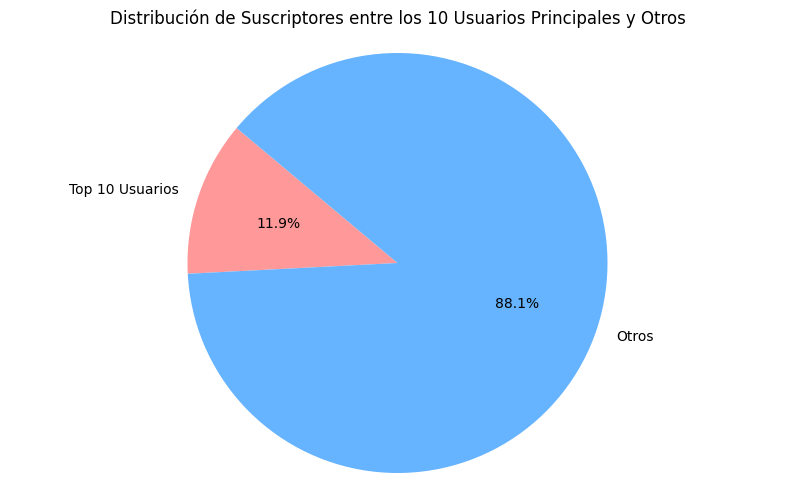

In [1010]:
top_10_subs = df2.nlargest(10, 'Subscribers Count')

# Sumar los valores de los 10 usuarios principales
top_10_subs_sum = top_10_subs['Subscribers Count'].sum()
top_10_subs_percentage = top_10_subs_sum / totales['Subscribers Count'] * 100

# Crear una categoría "Otros" que agrupe a los demás usuarios
otros_subs = df2[~df2['Username'].isin(top_10_subs['Username'])]['Subscribers Count'].sum()
otros_subs_percentage = otros_subs / totales['Subscribers Count'] * 100

# Datos para el gráfico de pastel
labels = ['Top 10 Usuarios', 'Otros']
sizes = [top_10_subs_percentage, otros_subs_percentage]

# Crear el gráfico de pastel
plt.figure(figsize=(10, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
plt.axis('equal')  # Asegurar que el gráfico es circular
plt.title('Distribución de Suscriptores entre los 10 Usuarios Principales y Otros')
plt.show()

In [1011]:
print('Estos usuarios principales representan el {:.1f}% del total de suscriptores, comparado con el {:.1f}% del resto de los 989 usuarios del dataset .'.format(top_10_subs_percentage, otros_subs_percentage))
print('-'*50)
print(top_10_subs.reset_index().to_string(index=False))

Estos usuarios principales representan el 11.9% del total de suscriptores, comparado con el 88.1% del resto de los 989 usuarios del dataset .
--------------------------------------------------
 index  Rank        Username                             Tiktok Link            Name  Subscribers Count  Views. Avg  Likes. Avg  Comments. Avg  Shares. Avg  Subscribers Count %  Views. Avg %  Likes. Avg %  Comments. Avg %  Shares. Avg %
     2     3      khaby.lame      https://www.tiktok.com/@khaby.lame    Khabane lame          145900000    47500000     2500000        46000.0       9400.0             2.112623      1.426774      0.626023         1.372725       0.269341
     8     9   charlidamelio   https://www.tiktok.com/@charlidamelio charli d’amelio          143300000    18500000     1200000        29600.0      12700.0             2.074975      0.555691      0.300491         0.883318       0.363897
    60    61     bellapoarch     https://www.tiktok.com/@bellapoarch    Bella Poarch           9

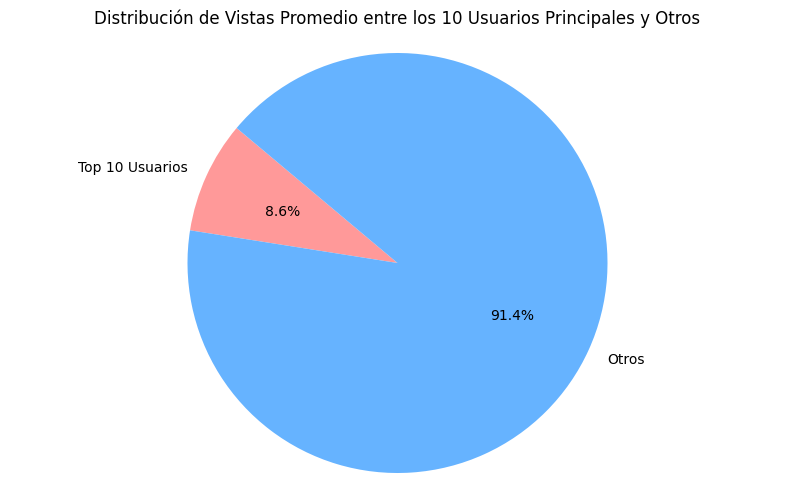

In [1012]:
top_10_views = df2.nlargest(10, 'Views. Avg')

# Sumar los valores de los 10 usuarios principales
top_10_views_sum = top_10_views['Views. Avg'].sum()
top_10_views_percentage = top_10_views_sum / totales['Views. Avg'] * 100

# Crear una categoría "Otros" que agrupe a los demás usuarios
otros_views = df2[~df2['Username'].isin(top_10_views['Username'])]['Views. Avg'].sum()
otros_views_percentage = otros_views / totales['Views. Avg'] * 100

# Datos para el gráfico de pastel
labels = ['Top 10 Usuarios', 'Otros']
sizes = [top_10_views_percentage, otros_views_percentage]

# Crear el gráfico de pastel
plt.figure(figsize=(10, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
plt.axis('equal')  # Asegurar que el gráfico es circular
plt.title('Distribución de Vistas Promedio entre los 10 Usuarios Principales y Otros')
plt.show()

In [1013]:
print('Estos usuarios principales representan el {:.1f}% del total de suscriptores, comparado con el {:.1f}% del resto de los 989 usuarios del dataset.'.format(top_10_views_percentage, otros_views_percentage))
print('-'*50)
print(top_10_views.reset_index().to_string(index=False))

Estos usuarios principales representan el 8.6% del total de suscriptores, comparado con el 91.4% del resto de los 989 usuarios del dataset.
--------------------------------------------------
 index  Rank               Username                                    Tiktok Link             Name  Subscribers Count  Views. Avg  Likes. Avg  Comments. Avg  Shares. Avg  Subscribers Count %  Views. Avg %  Likes. Avg %  Comments. Avg %  Shares. Avg %
     0     1               badbunny               https://www.tiktok.com/@badbunny        Bad Bunny           23400000    63100000    10300000        65200.0     108600.0             0.338831      1.895356      2.579213         1.945688       3.111748
     2     3             khaby.lame             https://www.tiktok.com/@khaby.lame     Khabane lame          145900000    47500000     2500000        46000.0       9400.0             2.112623      1.426774      0.626023         1.372725       0.269341
     3     4          coopernoriega          https://

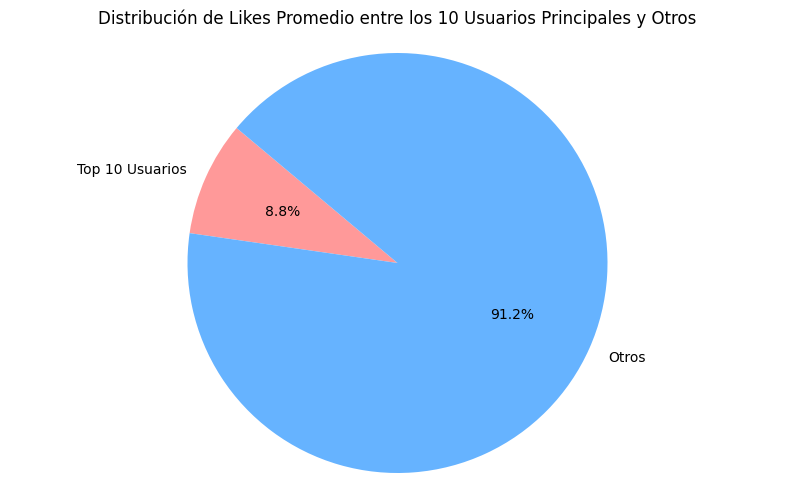

In [1014]:
top_10_likes = df2.nlargest(10, 'Likes. Avg')

# Sumar los valores de los 10 usuarios principales
top_10_likes_sum = top_10_likes['Likes. Avg'].sum()
top_10_likes_percentage = top_10_likes_sum / totales['Likes. Avg'] * 100

# Crear una categoría "Otros" que agrupe a los demás usuarios
otros_likes = df2[~df2['Username'].isin(top_10_likes['Username'])]['Likes. Avg'].sum()
otros_likes_percentage = otros_likes / totales['Likes. Avg'] * 100

# Datos para el gráfico de pastel
labels = ['Top 10 Usuarios', 'Otros']
sizes = [top_10_likes_percentage, otros_likes_percentage]

# Crear el gráfico de pastel
plt.figure(figsize=(10, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
plt.axis('equal')  # Asegurar que el gráfico es circular
plt.title('Distribución de Likes Promedio entre los 10 Usuarios Principales y Otros')
plt.show()


In [1015]:
print('Estos usuarios principales representan el {:.1f}% del total de likes, comparado con el {:.1f}% del resto de los 989 usuarios del dataset.'.format(top_10_likes_percentage, otros_likes_percentage))
print('-'*50)
print(top_10_likes.reset_index().to_string(index=False))

Estos usuarios principales representan el 8.8% del total de likes, comparado con el 91.2% del resto de los 989 usuarios del dataset.
--------------------------------------------------
 index  Rank               Username                                    Tiktok Link                Name  Subscribers Count  Views. Avg  Likes. Avg  Comments. Avg  Shares. Avg  Subscribers Count %  Views. Avg %  Likes. Avg %  Comments. Avg %  Shares. Avg %
     0     1               badbunny               https://www.tiktok.com/@badbunny           Bad Bunny           23400000    63100000    10300000        65200.0     108600.0             0.338831      1.895356      2.579213         1.945688       3.111748
     1     2            noahschnapp            https://www.tiktok.com/@noahschnapp        Noah Schnapp           26100000    23400000     4800000        46700.0      22100.0             0.377926      0.702874      1.201963         1.393614       0.633238
     4     5           avrillavigne           https

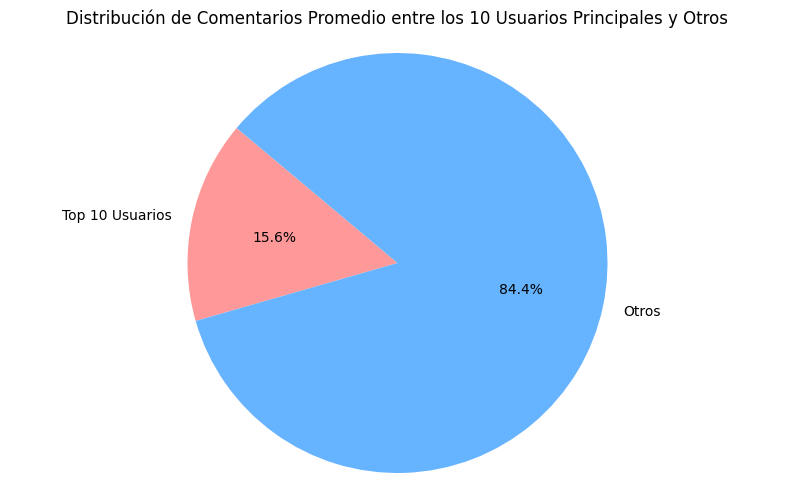

In [1016]:
top_10_comments = df2.nlargest(10, 'Comments. Avg')

# Sumar los valores de los 10 usuarios principales
top_10_comments_sum = top_10_comments['Comments. Avg'].sum()
top_10_comments_percentage = top_10_comments_sum / totales['Comments. Avg'] * 100

# Crear una categoría "Otros" que agrupe a los demás usuarios
otros_comments = df2[~df2['Username'].isin(top_10_comments['Username'])]['Comments. Avg'].sum()
otros_comments_percentage = otros_comments / totales['Comments. Avg'] * 100

# Datos para el gráfico de pastel
labels = ['Top 10 Usuarios', 'Otros']
sizes = [top_10_comments_percentage, otros_comments_percentage]

# Crear el gráfico de pastel
plt.figure(figsize=(10, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
plt.axis('equal')  # Asegurar que el gráfico es circular
plt.title('Distribución de Comentarios Promedio entre los 10 Usuarios Principales y Otros')
plt.show()


In [1017]:
print('Estos usuarios principales representan el {:.1f}% del total de comentarios , comparado con el {:.1f}% del resto de los 989 usuarios del dataset.'.format(top_10_comments_percentage, otros_comments_percentage))
print('-'*50)
print(top_10_comments.reset_index().to_string(index=False))

Estos usuarios principales representan el 15.6% del total de comentarios , comparado con el 84.4% del resto de los 989 usuarios del dataset.
--------------------------------------------------
 index  Rank               Username                                    Tiktok Link             Name  Subscribers Count  Views. Avg  Likes. Avg  Comments. Avg  Shares. Avg  Subscribers Count %  Views. Avg %  Likes. Avg %  Comments. Avg %  Shares. Avg %
     3     4          coopernoriega          https://www.tiktok.com/@coopernoriega   Cooper Noriega            3200000    31000000     1300000       120900.0       8400.0             0.046336      0.931158      0.325532         3.607878       0.240688
     0     1               badbunny               https://www.tiktok.com/@badbunny        Bad Bunny           23400000    63100000    10300000        65200.0     108600.0             0.338831      1.895356      2.579213         1.945688       3.111748
     9    10         scarlettsspam2         https://

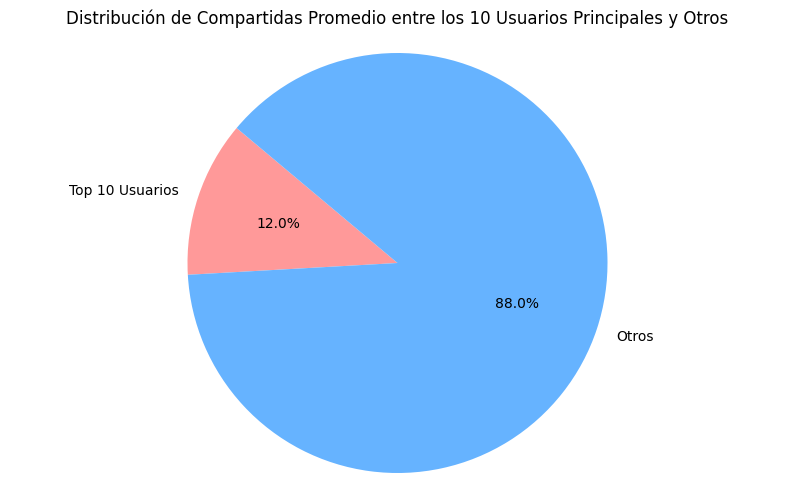

In [1018]:
top_10_shares = df2.nlargest(10, 'Shares. Avg')

# Sumar los valores de los 10 usuarios principales
top_10_shares_sum = top_10_shares['Shares. Avg'].sum()
top_10_shares_percentage = top_10_shares_sum / totales['Shares. Avg'] * 100

# Crear una categoría "Otros" que agrupe a los demás usuarios
otros_shares = df2[~df2['Username'].isin(top_10_shares['Username'])]['Shares. Avg'].sum()
otros_shares_percentage = otros_shares / totales['Shares. Avg'] * 100

# Datos para el gráfico de pastel
labels = ['Top 10 Usuarios', 'Otros']
sizes = [top_10_shares_percentage, otros_shares_percentage]

# Crear el gráfico de pastel
plt.figure(figsize=(10, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
plt.axis('equal')  # Asegurar que el gráfico es circular
plt.title('Distribución de Compartidas Promedio entre los 10 Usuarios Principales y Otros')
plt.show()


In [1019]:
print('Estos usuarios principales representan el {:.1f}% del total de compartidas , comparado con el {:.1f}% del resto de los 989 usuarios del dataset.'.format(top_10_shares_percentage, otros_shares_percentage))
print('-'*50)
print(top_10_shares.reset_index().to_string(index=False))

Estos usuarios principales representan el 12.0% del total de compartidas , comparado con el 88.0% del resto de los 989 usuarios del dataset.
--------------------------------------------------
 index  Rank              Username                                   Tiktok Link                  Name  Subscribers Count  Views. Avg  Likes. Avg  Comments. Avg  Shares. Avg  Subscribers Count %  Views. Avg %  Likes. Avg %  Comments. Avg %  Shares. Avg %
     0     1              badbunny              https://www.tiktok.com/@badbunny             Bad Bunny           23400000    63100000    10300000        65200.0     108600.0             0.338831      1.895356      2.579213         1.945688       3.111748
     7     8        daniel.labelle        https://www.tiktok.com/@daniel.labelle        Daniel LaBelle           26600000     9200000     1400000        15800.0      64700.0             0.385166      0.276344      0.350573         0.471501       1.853868
   289   290 tony_trindade_oficial https://